In [13]:
#NEW SINE FITTING(Synthetic), CURVE_FIT WITH A CHI_SQUARE EVALUATOR, updated on Tuesday, at 8:17 PM
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [14]:
# Define the sine function for Synthetic Data
def sin_function(t, amp0, freq0, phase0, vert0):
    return amp0 * np.sin(freq0 * t + phase0) + vert0

def fit_function(t, amp, phase, vert):
    return amp * np.sin(2*np.pi * t + phase) + vert

In [15]:
# Pandas Reading
import pandas as pd
NEID = pd.read_csv("NEID_RVS_PRELIM (2).csv")
NEID
BM = NEID.iloc[:, 16]
avg = np.sum(BM)/8
RV = BM-avg 
RV = RV*1000 #Replaces y
BJD = NEID.iloc[:, 15] #BJD(days) Replaces t
period_B = 2.77 #days


In [16]:
#Phase Folding
phase_B = (BJD % period_B) / period_B
freq_true = 2*np.pi/period_B


In [17]:
# Perform the initial fit
params, params_covariance = curve_fit(fit_function, phase_B, RV)
amp_fit, phase_fit, vert_fit = params

# Generate fitted data
freq_fit = freq_true
y_fit = sin_function(BJD, amp_fit, freq_fit, phase_fit, vert_fit)
print('Amplitude:', abs(amp_fit))
print('Phase:', phase_fit % (2*np.pi))
print('Vertical Shift:', vert_fit)


Amplitude: 66.9582738077581
Phase: 6.1120430117216245
Vertical Shift: 28.40915829651269


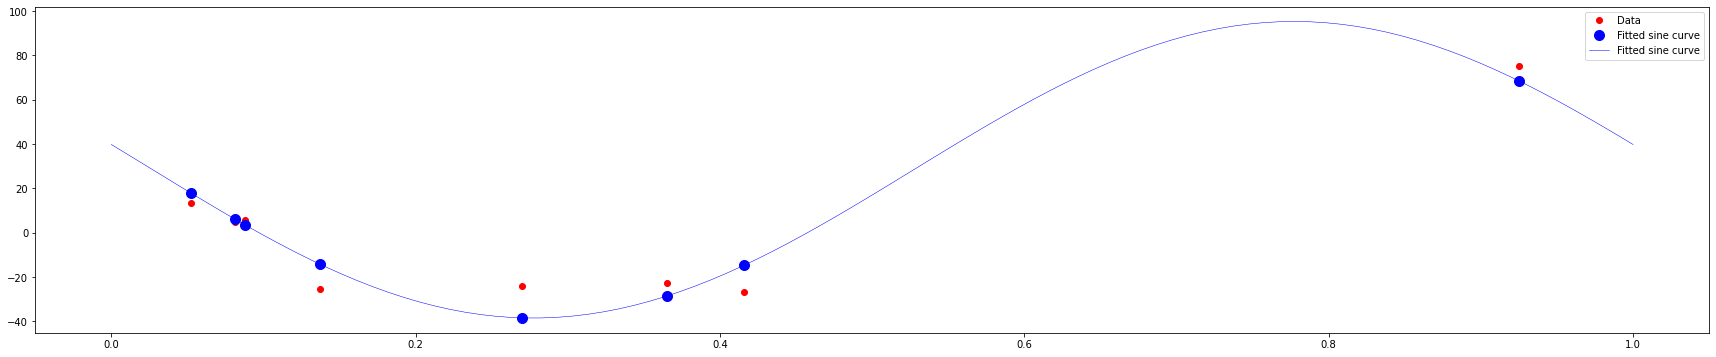

In [18]:
#Plotting
plt.figure(figsize=(30, 6))

plt.plot(phase_B, RV, 'o', label='Data', color='red')
plt.plot(phase_B, y_fit, '.', markersize = 20, label='Fitted sine curve', color='blue', linewidth=2)

t_fit = np.linspace(0, 1, 100)
y_line = fit_function(t_fit, amp_fit, phase_fit, vert_fit)
plt.plot(t_fit, y_line, label='Fitted sine curve', color='blue', linewidth=.5)

plt.legend()
plt.show()